##**Домашнее задание по теме "Оценка точности модели, переобучение, регуляризация"**

**Задание:**

**Цель:** закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

**Описание задания:**
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

**Этапы работы:**

1) Преобразуйте данные:

    a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

    b. закодируйте категориальные переменные числовыми значениями по необходимости.

2) Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

3) Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

4) Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

5) Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

6) Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

7) Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

8) Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

9) Сформулируйте выводы по проделанной работе:

    a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

    b. может ли ROC-кривая проходить ниже диагонали?

**Результат:**

* проведена оценка качества модели классификации;

* реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

**Форма выполнения:**

* ссылка на Jupyter Notebook, загруженный на GitHub;
* ссылка на Google Colab;
* файл с расширением .ipynb.

**Инструменты:**

* Jupyter Notebook/Google Colab
* GitHub
* файл athletes.csv

**Срок выполнения:** дедлайн приема решений на проверку

**Рекомендации к выполнению:**
* Убедитесь, что на графике ROC-кривой присутствует диагональная линия, начинающаяся в точке (0;0) и заканчивающаяся в точке (1;1).
* Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
* У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
* Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
* Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

**Решение:**

In [ ]:
# Загрузим необходимые библиотеки
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# 1. Загрузка и предобработка данных.

In [ ]:
# Загрузим данные
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0



Категориальные атрибуты:

name - имя атлета (категориальный)
nationality - национальность атлета (категориальный)
sex - пол атлета (категориальный)
dob - дата рождения, хотя это в настоящее время представлено как строка, можно рассматривать как категориальный атрибут, так как это категоризация в зависимости от года или месяца рождения (категориальный)
sport - вид спорта, которым занимается атлет (категориальный)
Количественные атрибуты:

height - рост атлета (количественный)
weight - вес атлета (количественный)
gold - количество золотых медалей (количественный)
silver - количество серебряных медалей (количественный)
bronze - количество бронзовых медалей (количественный)

In [ ]:
# Посмотрим на данные
df.describe(include='all')

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
count,1.153800e+04,11538,11538,11538,11537,11208.000000,10879.000000,11538,11538.000000,11538.000000,11538.000000
unique,NaN,11517,207,2,5595,NaN,NaN,28,NaN,NaN,NaN
top,NaN,Ahmed Mohamed,USA,male,2/18/93,NaN,NaN,athletics,NaN,NaN,NaN
freq,NaN,2,567,6333,9,NaN,NaN,2363,NaN,NaN,NaN
mean,4.999885e+08,NaN,NaN,NaN,NaN,1.766282,72.068205,NaN,0.057722,0.056769,0.061016
std,2.908648e+08,NaN,NaN,NaN,NaN,0.112719,16.177334,NaN,0.255910,0.239147,0.243320
min,1.834700e+04,NaN,NaN,NaN,NaN,1.210000,31.000000,NaN,0.000000,0.000000,0.000000
25%,2.450997e+08,NaN,NaN,NaN,NaN,1.690000,60.000000,NaN,0.000000,0.000000,0.000000
50%,5.002011e+08,NaN,NaN,NaN,NaN,1.760000,70.000000,NaN,0.000000,0.000000,0.000000
75%,7.539874e+08,NaN,NaN,NaN,NaN,1.840000,81.000000,NaN,0.000000,0.000000,0.000000


In [ ]:
# В данных есть столбцы с типами object, float64 и int64.
# В столбцах "dob", "height", "weight" есть пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


### 2) Удаление/замена пропусков.

In [ ]:
# Столбцы height" и "weight" заполним средними значениями с учетом пола

mean_weight_male = df.loc[df.sex == 'male'].weight.mean()
mean_weight_female = df.loc[df.sex == 'female'].weight.mean()
mean_height_male = df.loc[df.sex == 'male'].height.mean()
mean_height_female = df.loc[df.sex == 'female'].height.mean()

df.loc[(df.weight.isnull()) & (df.sex == 'male'), 'weight'] = mean_weight_male
df.loc[(df.weight.isnull()) & (df.sex == 'female'), 'weight'] = mean_weight_female
df.loc[(df.height.isnull()) & (df.sex == 'male'), 'height'] = mean_height_male
df.loc[(df.height.isnull()) & (df.sex == 'female'), 'height'] = mean_height_male

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11538 non-null  float64
 6   weight       11538 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
# В столбце "dob" (дата рождения) один пропуск
df[ pd.isnull( df['dob'] ) ]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,1.820965,80.1008,sailing,0,0,0


In [ ]:
# Дату рождения спортсмена можно посмотреть в интернете: https://ru.wikipedia.org/wiki/Созыкин,_Павел_Валерьевич
df.at[8546, 'dob']= '12/25/87'
df.at[8546, 'dob']

'12/25/87'

### 3) Выбор и замена категориальных переменных.

In [ ]:
# Выберем для анализа атрибуты
X = df [['height', 'weight', 'gold', 'silver', 'bronze']]
X

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0
...,...,...,...,...,...
11533,1.64,58.0,0,0,0
11534,1.73,63.0,0,0,0
11535,1.85,100.0,0,0,0
11536,1.60,56.0,0,0,0


In [ ]:
le = LabelEncoder()
le.fit(df['sex'])
y = pd.Series(data = le.transform(df['sex']))
y.head(5)


,0
0,1
1,0
2,1
3,1
4,1


# 2.  Разделение выборки на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# 3. Построение ROC-кривой.

In [ ]:
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000,
                           class_weight={0: y_train.value_counts(normalize=True)[0],
                                         1: y_train.value_counts(normalize=True)[1]}).fit(X_train, y_train)

In [ ]:
def classification(predict_proba, threshold=0.5):

    res = []
    for predicted_prob in predict_proba[:, 1]:
        if predicted_prob >= threshold:
            res.append(1)
        else:
            res.append(0)
    return res

In [ ]:
from sklearn.metrics import classification_report
print(classification_report( y_test, classification(model.predict_proba(X_test), threshold=0.043) ))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03      1037
           1       0.55      1.00      0.71      1271

    accuracy                           0.56      2308
   macro avg       0.78      0.51      0.37      2308
weighted avg       0.75      0.56      0.40      2308



In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]
y_proba

array([0.86569485, 0.75095558, 0.94938115, ..., 0.54991104, 0.13781662,
       0.93570157])

In [ ]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, y_proba)

Text(0, 0.5, 'TPR')

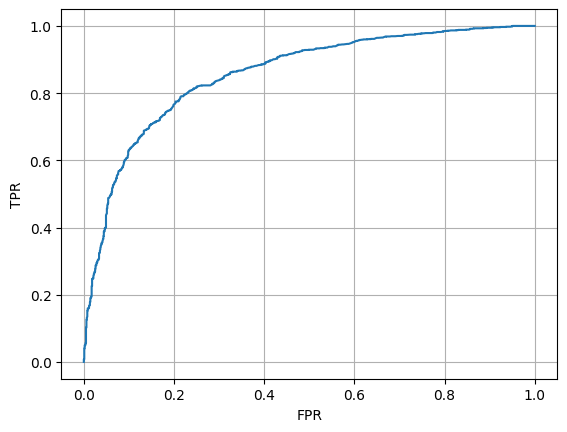

In [ ]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.grid()

ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

# 4. Вычисление значения ROC-AUC метрики

In [ ]:
roc_auc_score(y_test, y_proba)

0.8560606118084074

# 5. Реализация подсчета метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [ ]:
tpr_1 = []
fpr_1 = []
precision = []
for i in range(1, 100):
    thr = i/100
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predicted_classes = classification(model.predict_proba(X_test), threshold=thr)

    for predicted, actual in zip( predicted_classes, y_test ):
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    tpr_1.append(tp / (tp + fn + 1e-20))
    fpr_1.append(fp / (fp + tn + 1e-20))
    precision.append(tp / (tp + fp + 1e-20))

# 6. Построение ROC-кривых.

Text(0, 0.5, 'TPR')

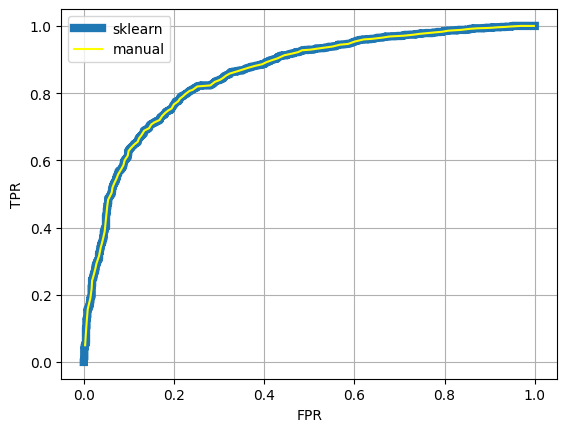

In [ ]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, linewidth=6)
ax.plot(fpr_1, tpr_1, color = "yellow")
ax.legend(['sklearn', 'manual'])
ax.grid()

ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

Графики и метрики совпадают.

# 7. Построение графика Precision-Recall.

Text(0.5, 0, 'recall')

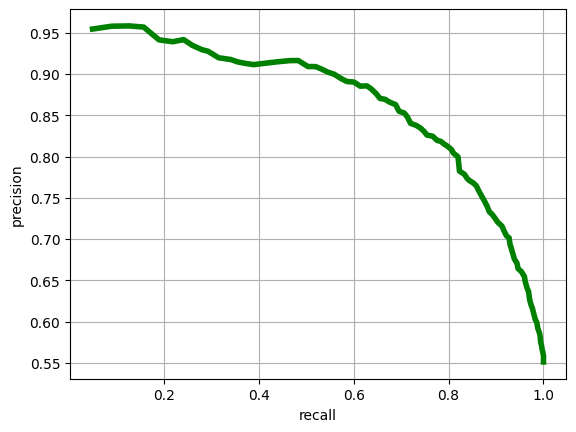

In [ ]:
fig, ax = plt.subplots()
ax.plot(tpr_1, precision,linewidth=4, color = "green")
ax.grid()

ax.set_ylabel('precision')
ax.set_xlabel('recall')

# 8. Вычисление значения ROC-AUC метрики.

In [ ]:
auc (fpr, tpr)

0.8560606118084074

# 9. Выводы по проделанной работе.

a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

Качество модели можно оценить по  Area Under the Curve (AUC)  - площади под ROC-кривой и Recall-Precision-кривой. В данном случае показательнее будет кривая Recall-Precision, т.к. имеет место несбалансированность классов. Обученную модель оцениваю как удовлетворительную.

b. может ли ROC-кривая проходить ниже диагонали?

Диагональ представляет собой линию случайного угадывания и соответствует модели, которая не имеет способности классифицировать объекты лучше, чем случайное угадывание. ROC-кривая может проходить ниже диагонали только в случае,если она классифицирует объекты хуже случайного угадывания.